In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

## Decision Tree classifier

Today your task is to get familiar with decision tree classifier - simple, but powerful case of dicsrete math usage

### Let's use the iris dataset
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [26]:
iris = load_iris()
# dir(iris)
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
iris.data.shape

(150, 4)

This means that we have 150 entries (samples, infos about a flower). The columns being: Sepal Length, Sepal Width, Petal Length and Petal Width. Let's look at first two entries

In [17]:
iris.data[52:62]

array([[6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5]])

## To undestand data little bit better, let's plot some features

Text(0, 0.5, 'Sepal width')

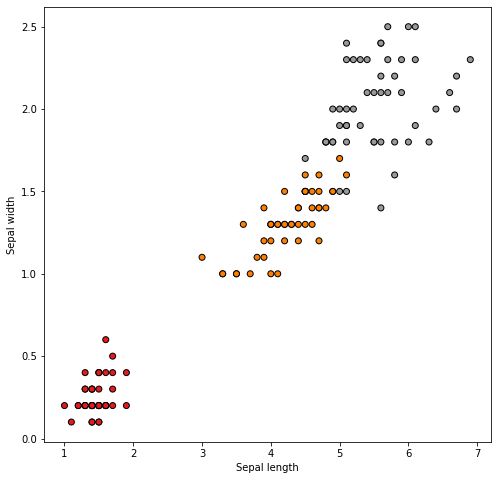

In [29]:
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target

plt.figure(4, figsize=(8, 8))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

From this we can clearly see, that even basing on those two parameters, we can clearly divide (classify) out data into several groups. For this, we will use decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#tree

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [7]:
clf = DecisionTreeClassifier()

In [8]:
X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

### Train / test split

We train our model using one dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data

In [9]:
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)

### Model learning

It learns its parameters (where it should split data and for whar threshold here)

In [19]:
clf = clf.fit(X, y)

### Visualization of produced tree

You do not need to understand this piece of code :)

In [21]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

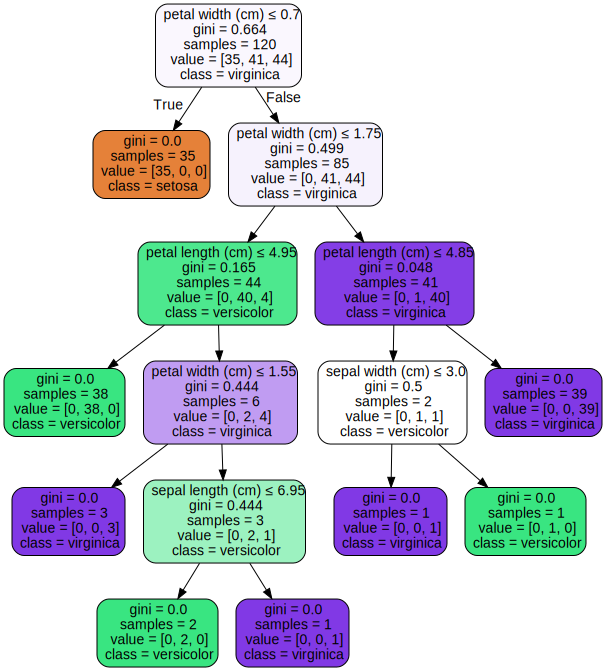

In [22]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [23]:
X_test.shape

(30, 4)

### Prediction step

Now we can use our model to predict which type has a flower, basing on its parameters.

This is conducted basically via traversing the tree that you can see above.

In [24]:
predictions = clf.predict(X_test)

### We can also measure the accuracy of our model

In [25]:
sum(predictions == y_test) / len(y_test)

0.9666666666666667

To get clearer intuition about predicion, let's look at those X, that should be labeled to some flower

In [26]:
y_test

array([0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 2, 2, 0, 0, 2, 0, 0])

Here you can traverse the tree above by yourself and make sure that prediction works

In [29]:
X_test[1]

array([5.2, 3.5, 1.5, 0.2])

In [30]:
clf.predict([X_test[1]])

array([0])

## Finally, it is your turn to write such classifier by yourself!

###  Gini impurity

Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$

In [31]:
class Node:
    
    def __init__(self, X, y, gini):
        self.X = X
        self.y = y
        self.gini = gini
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [33]:
class MyDecisionTreeClassifier:
    
    def __init__(self, max_depth):
        self.max_depth = max_depth
    
    def gini(self, groups, classes):
        '''
        A Gini score gives an idea of how good a split is by how mixed the
        classes are in the two groups created by the split.
        
        A perfect separation results in a Gini score of 0,
        whereas the worst case split that results in 50/50
        classes in each group result in a Gini score of 0.5
        (for a 2 class problem).
        '''
        
        pass
    
    def split_data(self, X, y) -> tuple[int, int]:
        
        # test all the possible splits in O(N^2)
        # return index and threshold value
        
        pass
    
    def build_tree(self, X, y, depth = 0):
        
        # create a root node
        
        
        # recursively split until max depth is not exeeced
        
        pass
    
    def fit(self, X, y):
        
        # basically wrapper for build tree
        
        pass
    
    def predict(self, X_test):
        
        # traverse the tree while there is left node
        # and return the predicted class for it, 
        # note that X_test can be not only one example
        
        pass

### Useful links:
- https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
- https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775
- https://towardsdatascience.com/decision-tree-algorithm-in-python-from-scratch-8c43f0e40173
- https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/